In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.preprocessing import StandardScaler

In [3]:
dataset = pd.read_csv('echocardiogram.csv')
dataset.head()

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,name,group,aliveat1
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.00,1.000,name,1,0.0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.70,0.588,name,1,0.0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.00,1.000,name,1,0.0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45,0.788,name,1,0.0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.25,0.571,name,1,0.0


In [4]:
dataset.isnull().sum()

survival                 3
alive                    2
age                      7
pericardialeffusion      1
fractionalshortening     9
epss                    16
lvdd                    12
wallmotion-score         5
wallmotion-index         3
mult                     4
name                     2
group                   23
aliveat1                58
dtype: int64

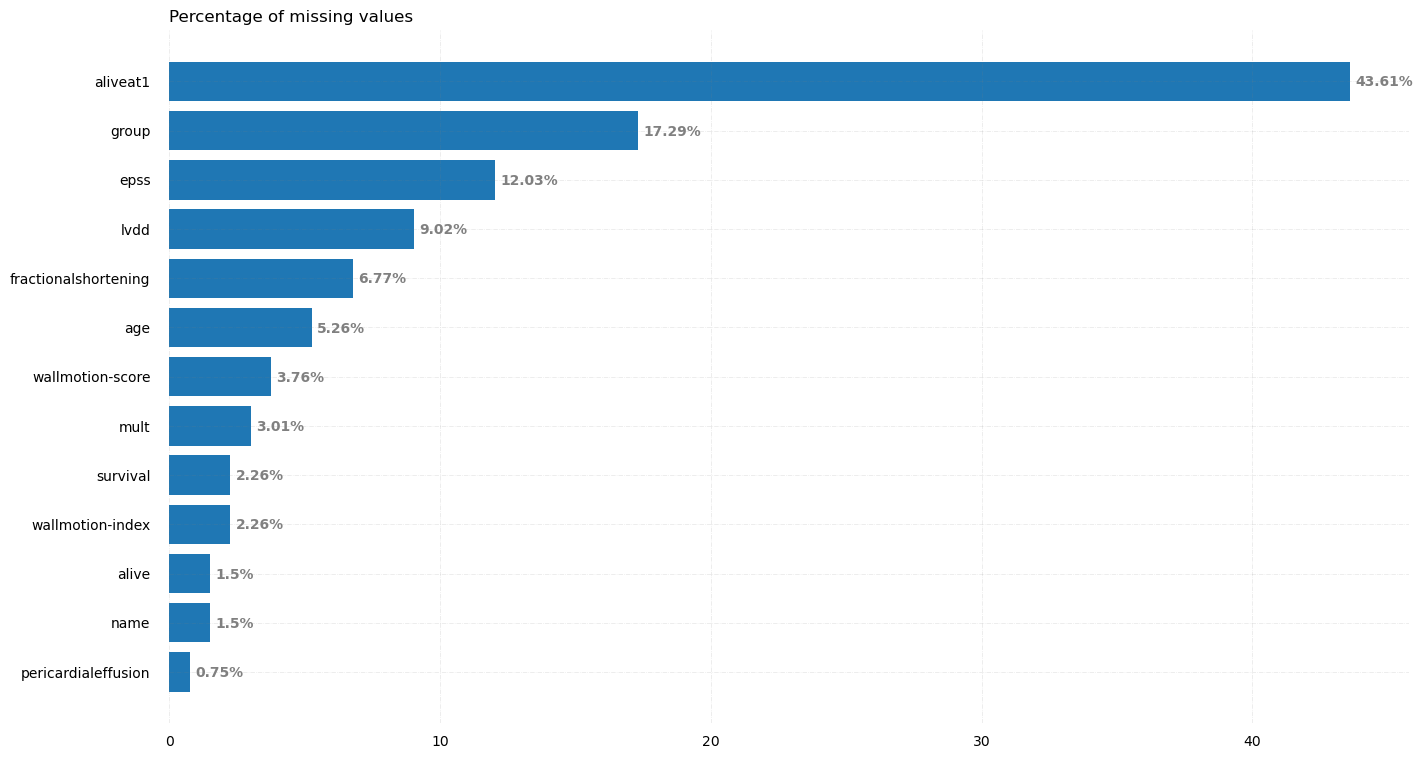

In [5]:
null_values_percentage = dataset.isnull().sum() * 100 / len(dataset)
null_values_percentage=null_values_percentage.sort_values(ascending=False)

#https://www.geeksforgeeks.org/bar-plot-in-matplotlib/

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(null_values_percentage.index, null_values_percentage.values)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2))+'%',
             fontsize = 10, fontweight ='bold',
             color ='grey')
    
# Add Plot Title
ax.set_title('Percentage of missing values',
             loc ='left', )
 
# Show Plot
plt.show()

In [6]:
for labels in dataset.columns:
    print(labels, ':' ,len(dataset[labels].unique()),'unique labels')

survival : 54 unique labels
alive : 3 unique labels
age : 39 unique labels
pericardialeffusion : 4 unique labels
fractionalshortening : 52 unique labels
epss : 83 unique labels
lvdd : 95 unique labels
wallmotion-score : 46 unique labels
wallmotion-index : 60 unique labels
mult : 28 unique labels
name : 2 unique labels
group : 4 unique labels
aliveat1 : 4 unique labels


In [7]:
#removing columns of no use and having more missing values
dataset = dataset.drop(['name', 'group', 'aliveat1'], axis=1)
dataset.head()


,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.00,1.000
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.70,0.588
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.00,1.000
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45,0.788
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.25,0.571


In [8]:
#checking null values for features
feature_null = [cols for cols in dataset.columns if dataset[cols].isnull().sum()>0]
for feature in feature_null:
    print(feature, ':', round(dataset[feature].isnull().mean(), 4), '%')

survival : 0.0226 %
alive : 0.015 %
age : 0.0526 %
pericardialeffusion : 0.0075 %
fractionalshortening : 0.0677 %
epss : 0.1203 %
lvdd : 0.0902 %
wallmotion-score : 0.0376 %
wallmotion-index : 0.0226 %
mult : 0.0301 %


In [9]:
#dropping null values present in alive column
dataset = dataset.dropna(subset=['alive'])
dataset['alive'].isnull().sum()

0

## Feature Selection

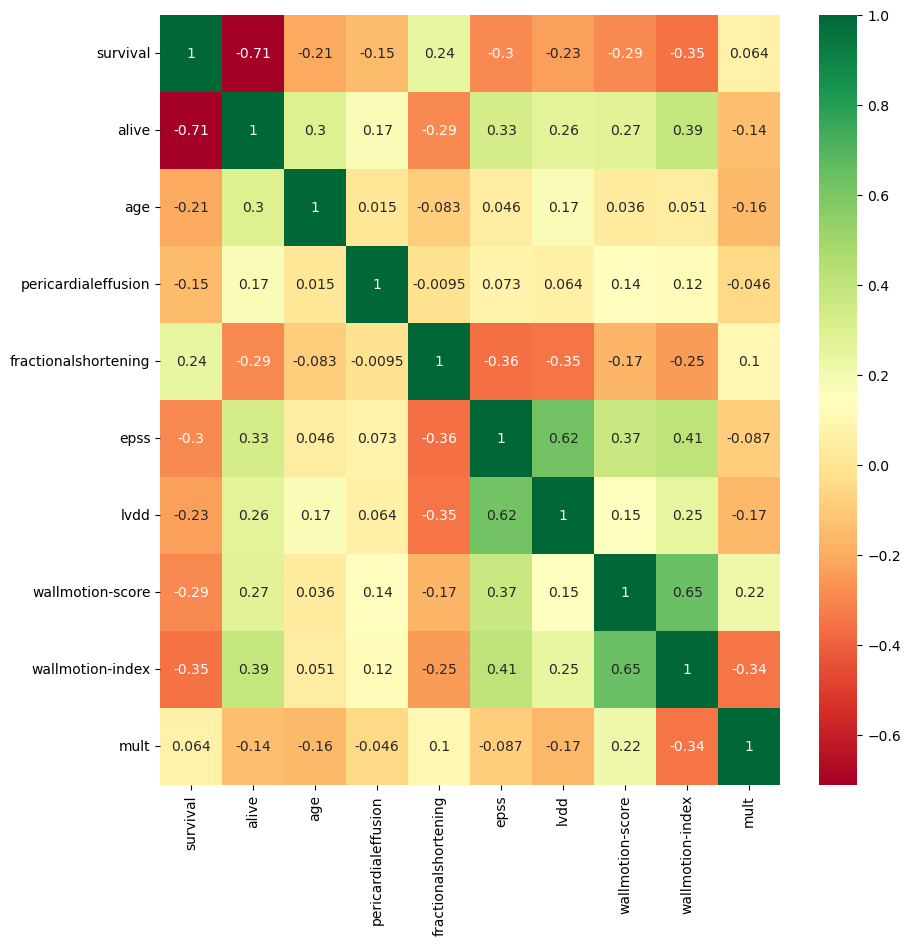

In [10]:
corr_matrix = dataset.corr()
corr_feat = corr_matrix.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(dataset[corr_feat].corr(),annot=True,cmap="RdYlGn")

array([[<AxesSubplot:title={'center':'survival'}>,
        <AxesSubplot:title={'center':'alive'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'pericardialeffusion'}>,
        <AxesSubplot:title={'center':'fractionalshortening'}>,
        <AxesSubplot:title={'center':'epss'}>],
       [<AxesSubplot:title={'center':'lvdd'}>,
        <AxesSubplot:title={'center':'wallmotion-score'}>,
        <AxesSubplot:title={'center':'wallmotion-index'}>],
       [<AxesSubplot:title={'center':'mult'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

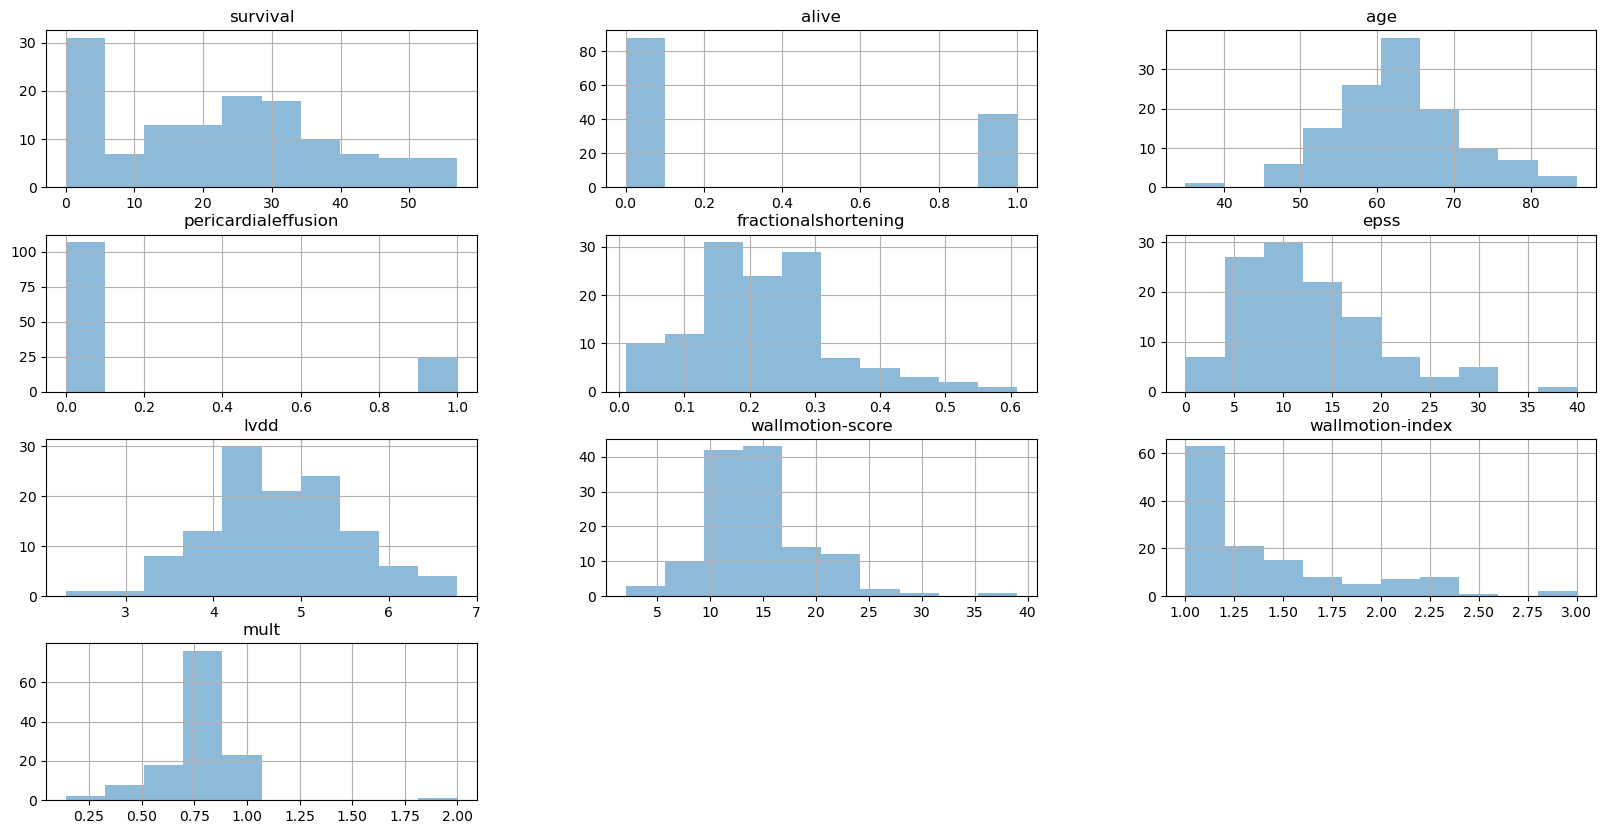

In [11]:
dataset.hist(alpha=0.5, figsize=(20, 10))

<AxesSubplot:xlabel='alive', ylabel='count'>

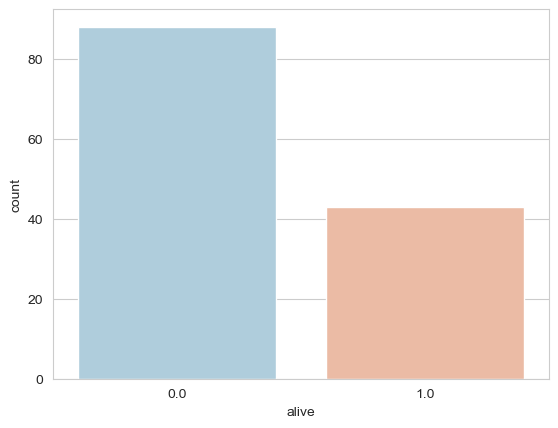

In [12]:
#checking balance of data
sns.set_style('whitegrid')
sns.countplot(x='alive',data=dataset,palette='RdBu_r')

##  Data Pre-processing

In [13]:
#checking null values
dataset.isnull().sum()

survival                 1
alive                    0
age                      5
pericardialeffusion      0
fractionalshortening     7
epss                    14
lvdd                    10
wallmotion-score         3
wallmotion-index         1
mult                     3
dtype: int64

In [14]:
cols_to_scale= dataset.drop(['pericardialeffusion', 'alive'], 1).columns
label1 = ['alive']

print(cols_to_scale)

Index(['survival', 'age', 'fractionalshortening', 'epss', 'lvdd',
       'wallmotion-score', 'wallmotion-index', 'mult'],
      dtype='object')


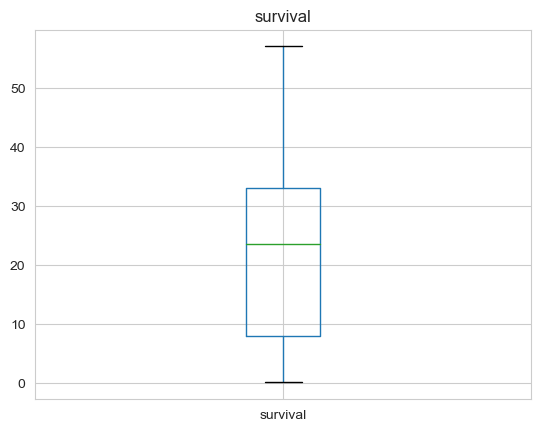

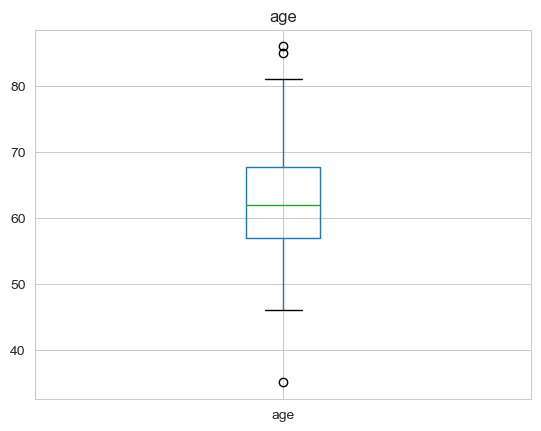

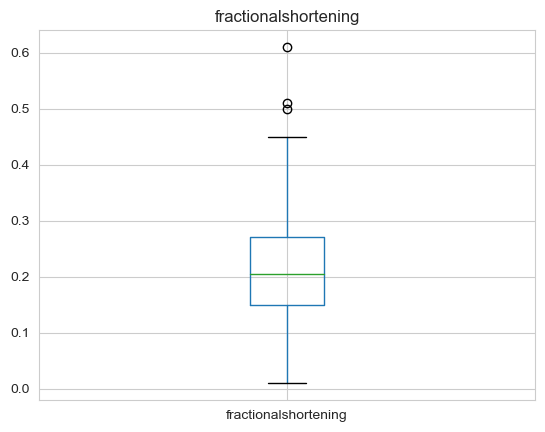

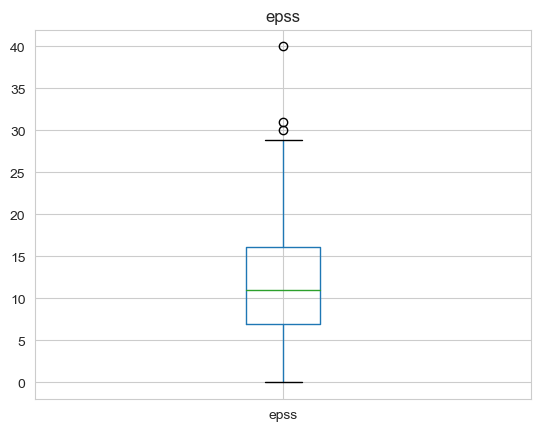

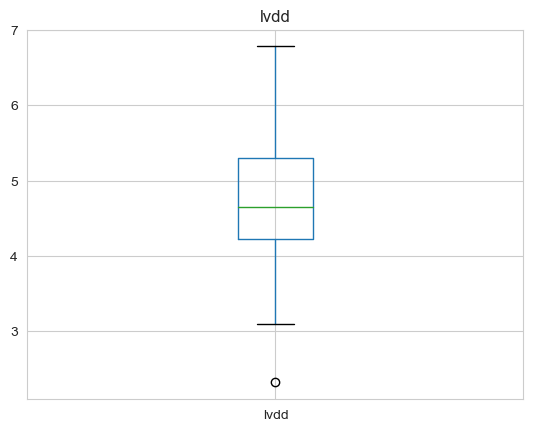

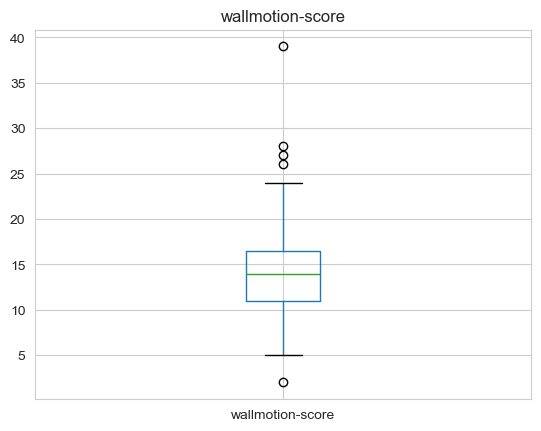

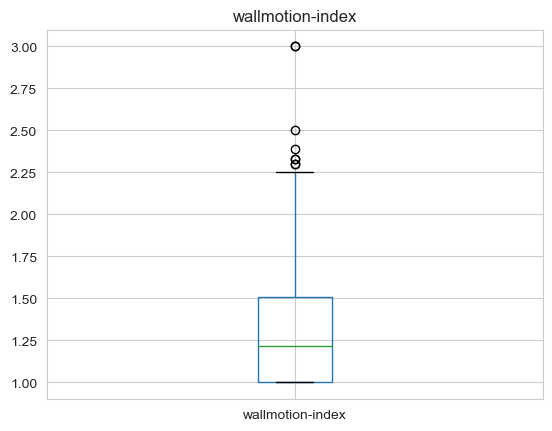

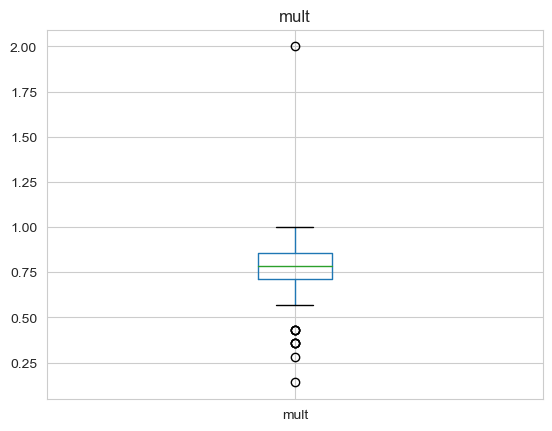

In [15]:
for cols in cols_to_scale:
    dataset.boxplot(cols)
    plt.title(cols)
    plt.show()

In [16]:
feat_with_outliers = ['wallmotion-score', 'wallmotion-index', 'mult']
for feat in cols_to_scale:
    if feat in feat_with_outliers:
        dataset[feat].fillna(dataset[feat].median(), inplace=True)
    else:
        dataset[feat].fillna(dataset[feat].mean(), inplace=True)

In [17]:
#https://bobrupakroy.medium.com/local-outlier-factor-lof-5d358ef8fd06
# identify outliers in the training dataset
from sklearn.neighbors import LocalOutlierFactor
loc = LocalOutlierFactor()
outliers = loc.fit_predict(dataset)

In [18]:
#select all rows that are not outliers
mask = outliers != -1

In [19]:
#checking if any outlier present
dataset.isnull().sum()

survival                0
alive                   0
age                     0
pericardialeffusion     0
fractionalshortening    0
epss                    0
lvdd                    0
wallmotion-score        0
wallmotion-index        0
mult                    0
dtype: int64

## Train - Test Split and Feature Scaling

In [20]:
dataset = dataset[mask]

In [21]:


dataset1 = pd.get_dummies(dataset, columns = ['pericardialeffusion'], drop_first = True)
scaler = StandardScaler()
dataset1[cols_to_scale] = scaler.fit_transform(dataset1[cols_to_scale])

In [22]:
dataset1.head()

,survival,alive,age,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,pericardialeffusion_1.0
0,-0.729968,0.0,1.039461,0.419602,-0.470229,-0.190540,-0.050728,-0.856557,1.156755,0
1,-0.221716,0.0,1.170502,1.580619,-0.940477,-0.839869,-0.050728,0.769979,-0.939966,0
2,-0.412311,0.0,-1.057203,0.419602,-1.253976,-1.722956,-0.050728,-0.856557,1.156755,0
3,2.192480,0.0,-0.401996,0.351875,0.009737,-0.186644,0.392359,0.189073,0.077860,0
4,-0.221716,1.0,-0.795120,-0.547913,1.567512,1.302915,0.835445,2.047971,-1.026482,0


In [23]:
X = dataset.drop(['alive'], 1)
y = dataset['alive']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((88, 9), (39, 9))

In [25]:
accuracy = {}


## Model Training and Testing

In [26]:
model_1 = LogisticRegression(max_iter=200)
model_1.fit(X_train, y_train)
y_prediction1 = model_1.predict(X_test)
print(accuracy_score(y_test, y_prediction1))
accuracy[str(model_1)] = accuracy_score(y_test, y_prediction1)*100

0.8205128205128205


In [27]:
model_2 = DecisionTreeClassifier(max_depth=3)
model_2.fit(X_train, y_train)
y_pred2 = model_2.predict(X_test)
print(accuracy_score(y_test, y_pred2))
accuracy[str(model_2)] = accuracy_score(y_test, y_pred2)*100

0.8974358974358975


Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

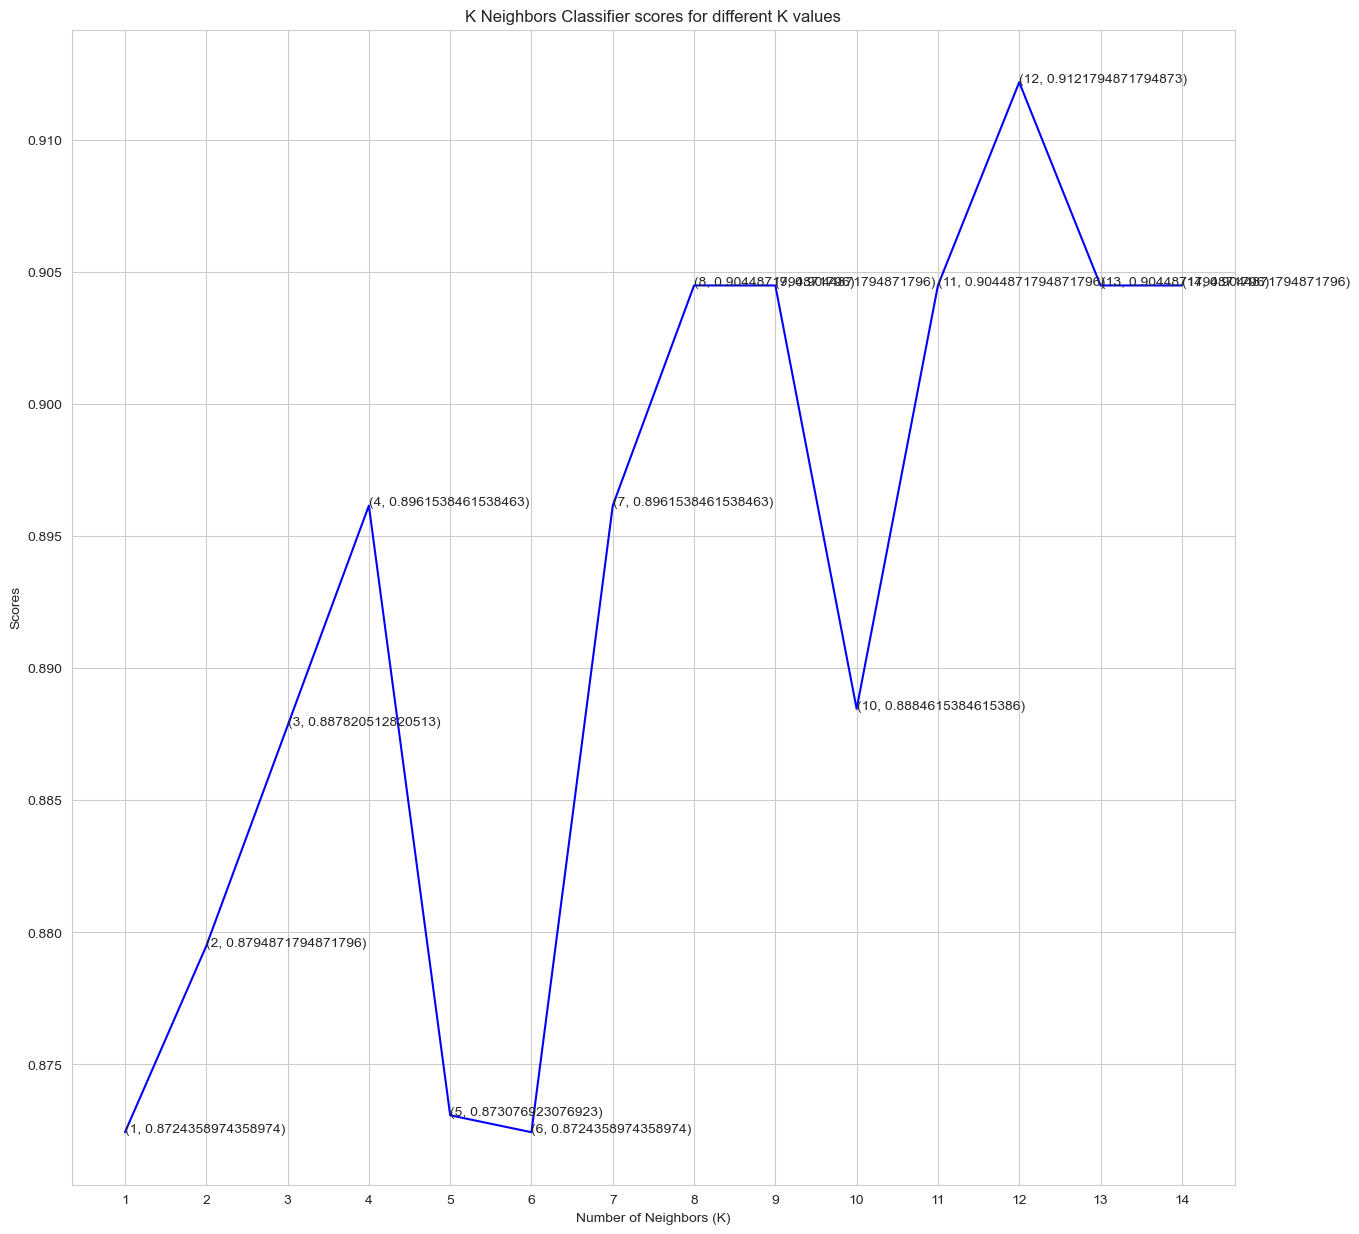

In [28]:
from sklearn.model_selection import cross_val_score
scores_for_knn = []
for k in range(1,15):
    knn_model_3 = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_model_3,X,y,cv=10)
    scores_for_knn.append(score.mean())
    
plt.figure(figsize=(15,15))
plt.plot([k for k in range(1, 15)], scores_for_knn, color = 'blue')
for i in range(1,15):
    plt.text(i, scores_for_knn[i-1], (i, scores_for_knn[i-1]))
plt.xticks([i for i in range(1, 15)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')


In [29]:
knn_model_classification = KNeighborsClassifier(n_neighbors = 12)
acc=cross_val_score(knn_model_classification,X,y,cv=10)
acc.mean()

0.9121794871794873

In [30]:
model_4 = RandomForestClassifier(max_depth=7)
model_4.fit(X_train, y_train)
y_prediction_4 = model_4.predict(X_test)
print(accuracy_score(y_test, y_prediction_4))
accuracy[str(model_4)] = accuracy_score(y_test, y_prediction_4)*100

0.9230769230769231
